# Part I - Loan Data Exploration for Prosper
## by Olalekan Ayinde

## Introduction
> The document explores a dataset containing loan data for Prosper and 81 attributes for approximately 113937 customers. 





## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [2]:
# Load in the dataset into a pandas dataframe, print statistics
prosper_df = pd.read_csv('prosperLoanData.csv')

#make a copy of the prosper dataset
prosper = prosper_df.copy()

#Setting the ListingKey as the index
#prosper.set_index('ListingKey', inplace = True)

In [3]:
#high-level overview of data shape and composition
print(prosper.shape)
print(prosper.dtypes)
print(prosper.head(10))

(113937, 81)
ListingKey                      object
ListingNumber                    int64
ListingCreationDate             object
CreditGrade                     object
Term                             int64
                                ...   
PercentFunded                  float64
Recommendations                  int64
InvestmentFromFriendsCount       int64
InvestmentFromFriendsAmount    float64
Investors                        int64
Length: 81, dtype: object
                ListingKey  ListingNumber            ListingCreationDate  \
0  1021339766868145413AB3B         193129  2007-08-26 19:09:29.263000000   
1  10273602499503308B223C1        1209647  2014-02-27 08:28:07.900000000   
2  0EE9337825851032864889A          81716  2007-01-05 15:00:47.090000000   
3  0EF5356002482715299901A         658116  2012-10-22 11:02:35.010000000   
4  0F023589499656230C5E3E2         909464  2013-09-14 18:38:39.097000000   
5  0F05359734824199381F61D        1074836  2013-12-14 08:26:37.093000000   


In [4]:
#descriptive statistics for numeric variables
prosper.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


### Cleaning Data

#### 1. The need to check for duplicate rows
#### Define

#### Issue: The need to check for duplicate rows
#### Solution: Use duplicated( ) method to check for duplicated rows

#### Code

In [5]:
# Check duplication in our dataset
duplicated_prosper = prosper[prosper.duplicated()]

#### Test

In [6]:
duplicated_prosper

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors


#### 2. Conversion of date from string to datetime

#### Issue: Check for the data type of all the date fields (ListingCreationDate, ClosedDate, DateCreditPulled, FirstRecordedCreditLine, LoanOriginationDate) and convert them from string to datetime
#### Solution: Use info() method to display all the data types for all the fields. Then use to_datetime() method to convert from string data type to datetime

#### Code

In [7]:
#Use info() method to display all the data types of the fields
prosper.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

##### ListingCreationDate, ClosedDate, DateCreditPulled, FirstRecordedCreditLine, LoanOriginationDate are all string data type

In [8]:
# Change the data type of the above listed columns from string to datetime using to_datetime() method
prosper[['ListingCreationDate', 'ClosedDate', 'DateCreditPulled', 'FirstRecordedCreditLine', 'LoanOriginationDate']] = prosper[['ListingCreationDate', 'ClosedDate', 'DateCreditPulled', 'FirstRecordedCreditLine', 'LoanOriginationDate']].apply(pd.to_datetime)

#### Test

In [9]:
# Check the new data type for above listed fields
prosper.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   ListingKey                           113937 non-null  object        
 1   ListingNumber                        113937 non-null  int64         
 2   ListingCreationDate                  113937 non-null  datetime64[ns]
 3   CreditGrade                          28953 non-null   object        
 4   Term                                 113937 non-null  int64         
 5   LoanStatus                           113937 non-null  object        
 6   ClosedDate                           55089 non-null   datetime64[ns]
 7   BorrowerAPR                          113912 non-null  float64       
 8   BorrowerRate                         113937 non-null  float64       
 9   LenderYield                          113937 non-null  float64       
 

##### Data type for ListingCreationDate, ClosedDate, DateCreditPulled, FirstRecordedCreditLine, LoanOriginationDate has been changed from string to datetime.

In [10]:
prosper.isnull().sum()

ListingKey                         0
ListingNumber                      0
ListingCreationDate                0
CreditGrade                    84984
Term                               0
                               ...  
PercentFunded                      0
Recommendations                    0
InvestmentFromFriendsCount         0
InvestmentFromFriendsAmount        0
Investors                          0
Length: 81, dtype: int64

In [11]:
prosper.isnull().count()

ListingKey                     113937
ListingNumber                  113937
ListingCreationDate            113937
CreditGrade                    113937
Term                           113937
                                ...  
PercentFunded                  113937
Recommendations                113937
InvestmentFromFriendsCount     113937
InvestmentFromFriendsAmount    113937
Investors                      113937
Length: 81, dtype: int64

In [12]:
#Display all the mssing values in the dataset
pd.DataFrame(prosper.isna().sum()).head(n = 60)

,0
ListingKey,0
ListingNumber,0
ListingCreationDate,0
CreditGrade,84984
Term,0
LoanStatus,0
ClosedDate,58848
BorrowerAPR,25
BorrowerRate,0
LenderYield,0


In [13]:
#Display all the mssing values in the dataset (continued)
pd.DataFrame(prosper.isna().sum()).tail(n = 21)

,0
LoanFirstDefaultedCycleNumber,96985
LoanMonthsSinceOrigination,0
LoanNumber,0
LoanOriginalAmount,0
LoanOriginationDate,0
LoanOriginationQuarter,0
MemberKey,0
MonthlyLoanPayment,0
LP_CustomerPayments,0
LP_CustomerPrincipalPayments,0


#### 3. The need to drop columns with too many missing values
#### Define

#### Issue: There are columns with more than 20% missing value. We need to drop them. Except for EstimatedEffectiveYield, EstimatedLoss, EstimatedReturn, ProsperRating (numeric), ProsperRating (Alpha) which also have missing value more than 20% but are important to our investigation. By physical inspection of the dataset, it shows that the 6 columns have the same missing rows, thereby making it easy to investigate them together.  
#### Solution: Drop the columns using drop() method

#### Code

In [14]:
# Drop columns that have up to 20% missing values
prosper = prosper.drop(['CreditGrade','ClosedDate', 'GroupKey', 'TotalProsperLoans', 'TotalProsperPaymentsBilled', 'OnTimeProsperPayments',
                        'ProsperPaymentsLessThanOneMonthLate', 'ProsperPaymentsOneMonthPlusLate',
                        'ProsperPrincipalBorrowed', 'ProsperPrincipalOutstanding', 'ScorexChangeAtTimeOfListing',
                        'LoanFirstDefaultedCycleNumber'], axis=1)

#### Test

In [15]:
pd.DataFrame(prosper.isna().sum()).head(n = 60)

,0
ListingKey,0
ListingNumber,0
ListingCreationDate,0
Term,0
LoanStatus,0
BorrowerAPR,25
BorrowerRate,0
LenderYield,0
EstimatedEffectiveYield,29084
EstimatedLoss,29084


In [16]:
pd.DataFrame(prosper.isna().sum()).tail(n = 21)

,0
LoanCurrentDaysDelinquent,0
LoanMonthsSinceOrigination,0
LoanNumber,0
LoanOriginalAmount,0
LoanOriginationDate,0
LoanOriginationQuarter,0
MemberKey,0
MonthlyLoanPayment,0
LP_CustomerPayments,0
LP_CustomerPrincipalPayments,0


#### The following columns with more than 20% missing values have been removed from the dataset. 
> 'CreditGrade','ClosedDate', 'GroupKey', 'TotalProsperLoans', 'TotalProsperPaymentsBilled', 'OnTimeProsperPayments',
>  'perPaymentsLessThanOneMonthLate', 'ProsperPaymentsOneMonthPlusLate',
>  'ProsperPrincipalBorrowed', 'ProsperPrincipalOutstanding', 'ScorexChangeAtTimeOfListing',
>  'LoanFirstDefaultedCycleNumber''CreditGrade','ClosedDate', 'EstimatedEffectiveYield', 'EstimatedLoss', 'EstimatedReturn',
>  'ProsperRating (numeric)', 'ProsperRating (Alpha)', 'ProsperScore', 
>  'GroupKey', 'TotalProsperLoans', 'TotalProsperPaymentsBilled', 'OnTimeProsperPayments',
>  'ProsperPaymentsLessThanOneMonthLate', 'ProsperPaymentsOneMonthPlusLate',
>  'ProsperPrincipalBorrowed', 'ProsperPrincipalOutstanding', 'ScorexChangeAtTimeOfListing',
>  'LoanFirstDefaultedCycleNumber'

### What is the structure of your dataset?

> There are 113937 customers in the dataset with 81 features. We are focusing our exploration on about 10-15 features in the dataset. Most variables are numeric in nature, but the variable ProsperRating(Alpha) is an ordered factor variable with the corresponding numeric values captured in ProsperRating(Numeric). They have the following levels.
(worst) ----> (best)
ProsperRating(Alpha): HR, E, D, C, B, A, AA
ProsperRating(Numeric): 1, 2, 3, 4, 5, 6, 7

>Prosper is an online lending platform in US. It also serve as a platform where individual lenders can lend money to borrowers. It offers credit cards services. Investors can invest in the company. Investment as be as low as $25.  
															
                                                            
### What is/are the main feature(s) of interest in your dataset?

The following are the features of interest in the dataset:
>1. LoanStatus: There is need to determine the factors that affect a loan outcome status. 
>2. LenderYield: It is also neceesary to determine the factors that to lender's high or low yield. This will help in deciding the right investment. 
>3. BorrowerAPR: There is also a need to determine to factors that affect borrower's Annual Percentage Rate(APR). This is the annual cost of a loan to a borrower. It includes others fees. It is expressed in percentage. Other charges or fees such as mortgage insurance, discount points, loan original fees and most closing cost.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

The following features will support our invetigation into the features of interest:
>1. ProsperRating (numeric)
>2. ListingCategory
>3. Occupation
>4. EmploymentStatus
>5. EmploymentStatusDuration
>6. DeliquenciesLast7Years
>7. IncomeRange
>8. IncomeVerifiable
>9. StatedMonthlyIncome
>10. RevolvingCreditBalance

## Univariate Exploration
> In this session I investigated the relation between individual variables with respect to features of interests

#### We shall begin by looking at the distribution of the main variable of interest: LoanStatus, LenderYield, BorrowerAPR.

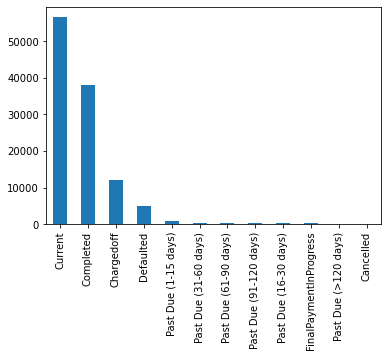

In [17]:
#Start with standard-scale plot 
#Add comment to bar chart

prosper['LoanStatus'].value_counts().plot(kind='bar');

In [18]:
# Values for LoanStatus that below 100000
prosper['LoanStatus'].value_counts().loc[lambda x:x < 100000]

Current                   56576
Completed                 38074
Chargedoff                11992
Defaulted                  5018
Past Due (1-15 days)        806
Past Due (31-60 days)       363
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      205
Past Due (>120 days)         16
Cancelled                     5
Name: LoanStatus, dtype: int64

Prosper as a company, considering the currency of this dataset (which was 2017), as 56,576 current loans that are running. About 38,074 ones have been completed, 5,018 defaulters while only 5 are cancelled. 

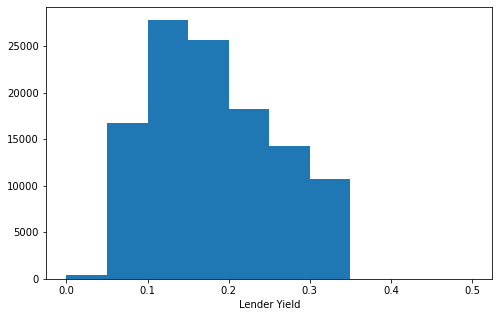

In [19]:
# start with a standard-scaled plot for LenderYield
binsize = 0.05
bins = np.arange(0, prosper['LenderYield'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = prosper, x = 'LenderYield', bins = bins)
plt.xlabel('Lender Yield')
plt.show();

This is a right skewed histogram. This means that the mean > median > mode. This means that average lender yield is greater that median for all lender yield, which implies that the lenders could have more prospect investing in Prosper as a company. 

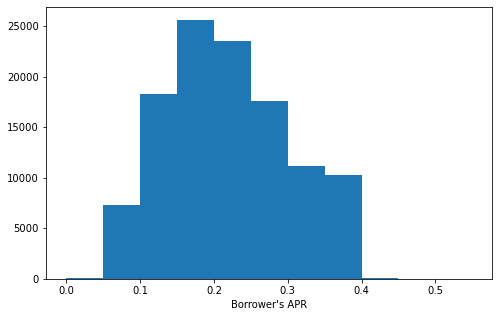

In [20]:
# plot a standard-scaled plot for BorrowerAPR
binsize = 0.05
bins = np.arange(0, prosper['BorrowerAPR'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = prosper, x = 'BorrowerAPR', bins = bins)
plt.xlabel('Borrower\'s APR')
plt.show();

Let us determine the unique values for other features ('Occupation', 'EmploymentStatus', 'IncomeVerifiable') in relation to our feature of interest ('LoanStatus')

In [21]:
#Unique values for 'Occupation'
prosper.Occupation.unique()

array(['Other', 'Professional', 'Skilled Labor', 'Executive',
       'Sales - Retail', 'Laborer', 'Food Service', 'Fireman',
       'Waiter/Waitress', 'Construction', 'Computer Programmer',
       'Sales - Commission', 'Retail Management', 'Engineer - Mechanical',
       'Military Enlisted', 'Clerical', nan, 'Teacher', 'Clergy',
       'Accountant/CPA', 'Attorney', 'Nurse (RN)', 'Analyst',
       "Nurse's Aide", 'Investor', 'Realtor', 'Flight Attendant',
       'Nurse (LPN)', 'Military Officer', 'Food Service Management',
       'Truck Driver', 'Administrative Assistant',
       'Police Officer/Correction Officer', 'Social Worker',
       'Tradesman - Mechanic', 'Medical Technician', 'Professor',
       'Postal Service', 'Civil Service', 'Pharmacist',
       'Tradesman - Electrician', 'Scientist', 'Dentist',
       'Engineer - Electrical', 'Architect', 'Landscaping',
       'Tradesman - Carpenter', 'Bus Driver', 'Tradesman - Plumber',
       'Engineer - Chemical', 'Doctor', 'Chemist',


In [22]:
#Unique values for 'EmploymentStatus'
prosper.EmploymentStatus.unique()

array(['Self-employed', 'Employed', 'Not available', 'Full-time', 'Other',
       nan, 'Not employed', 'Part-time', 'Retired'], dtype=object)

In [23]:
#Unique values for 'IncomeVerifiable'
prosper.IncomeVerifiable.unique()

array([ True, False])

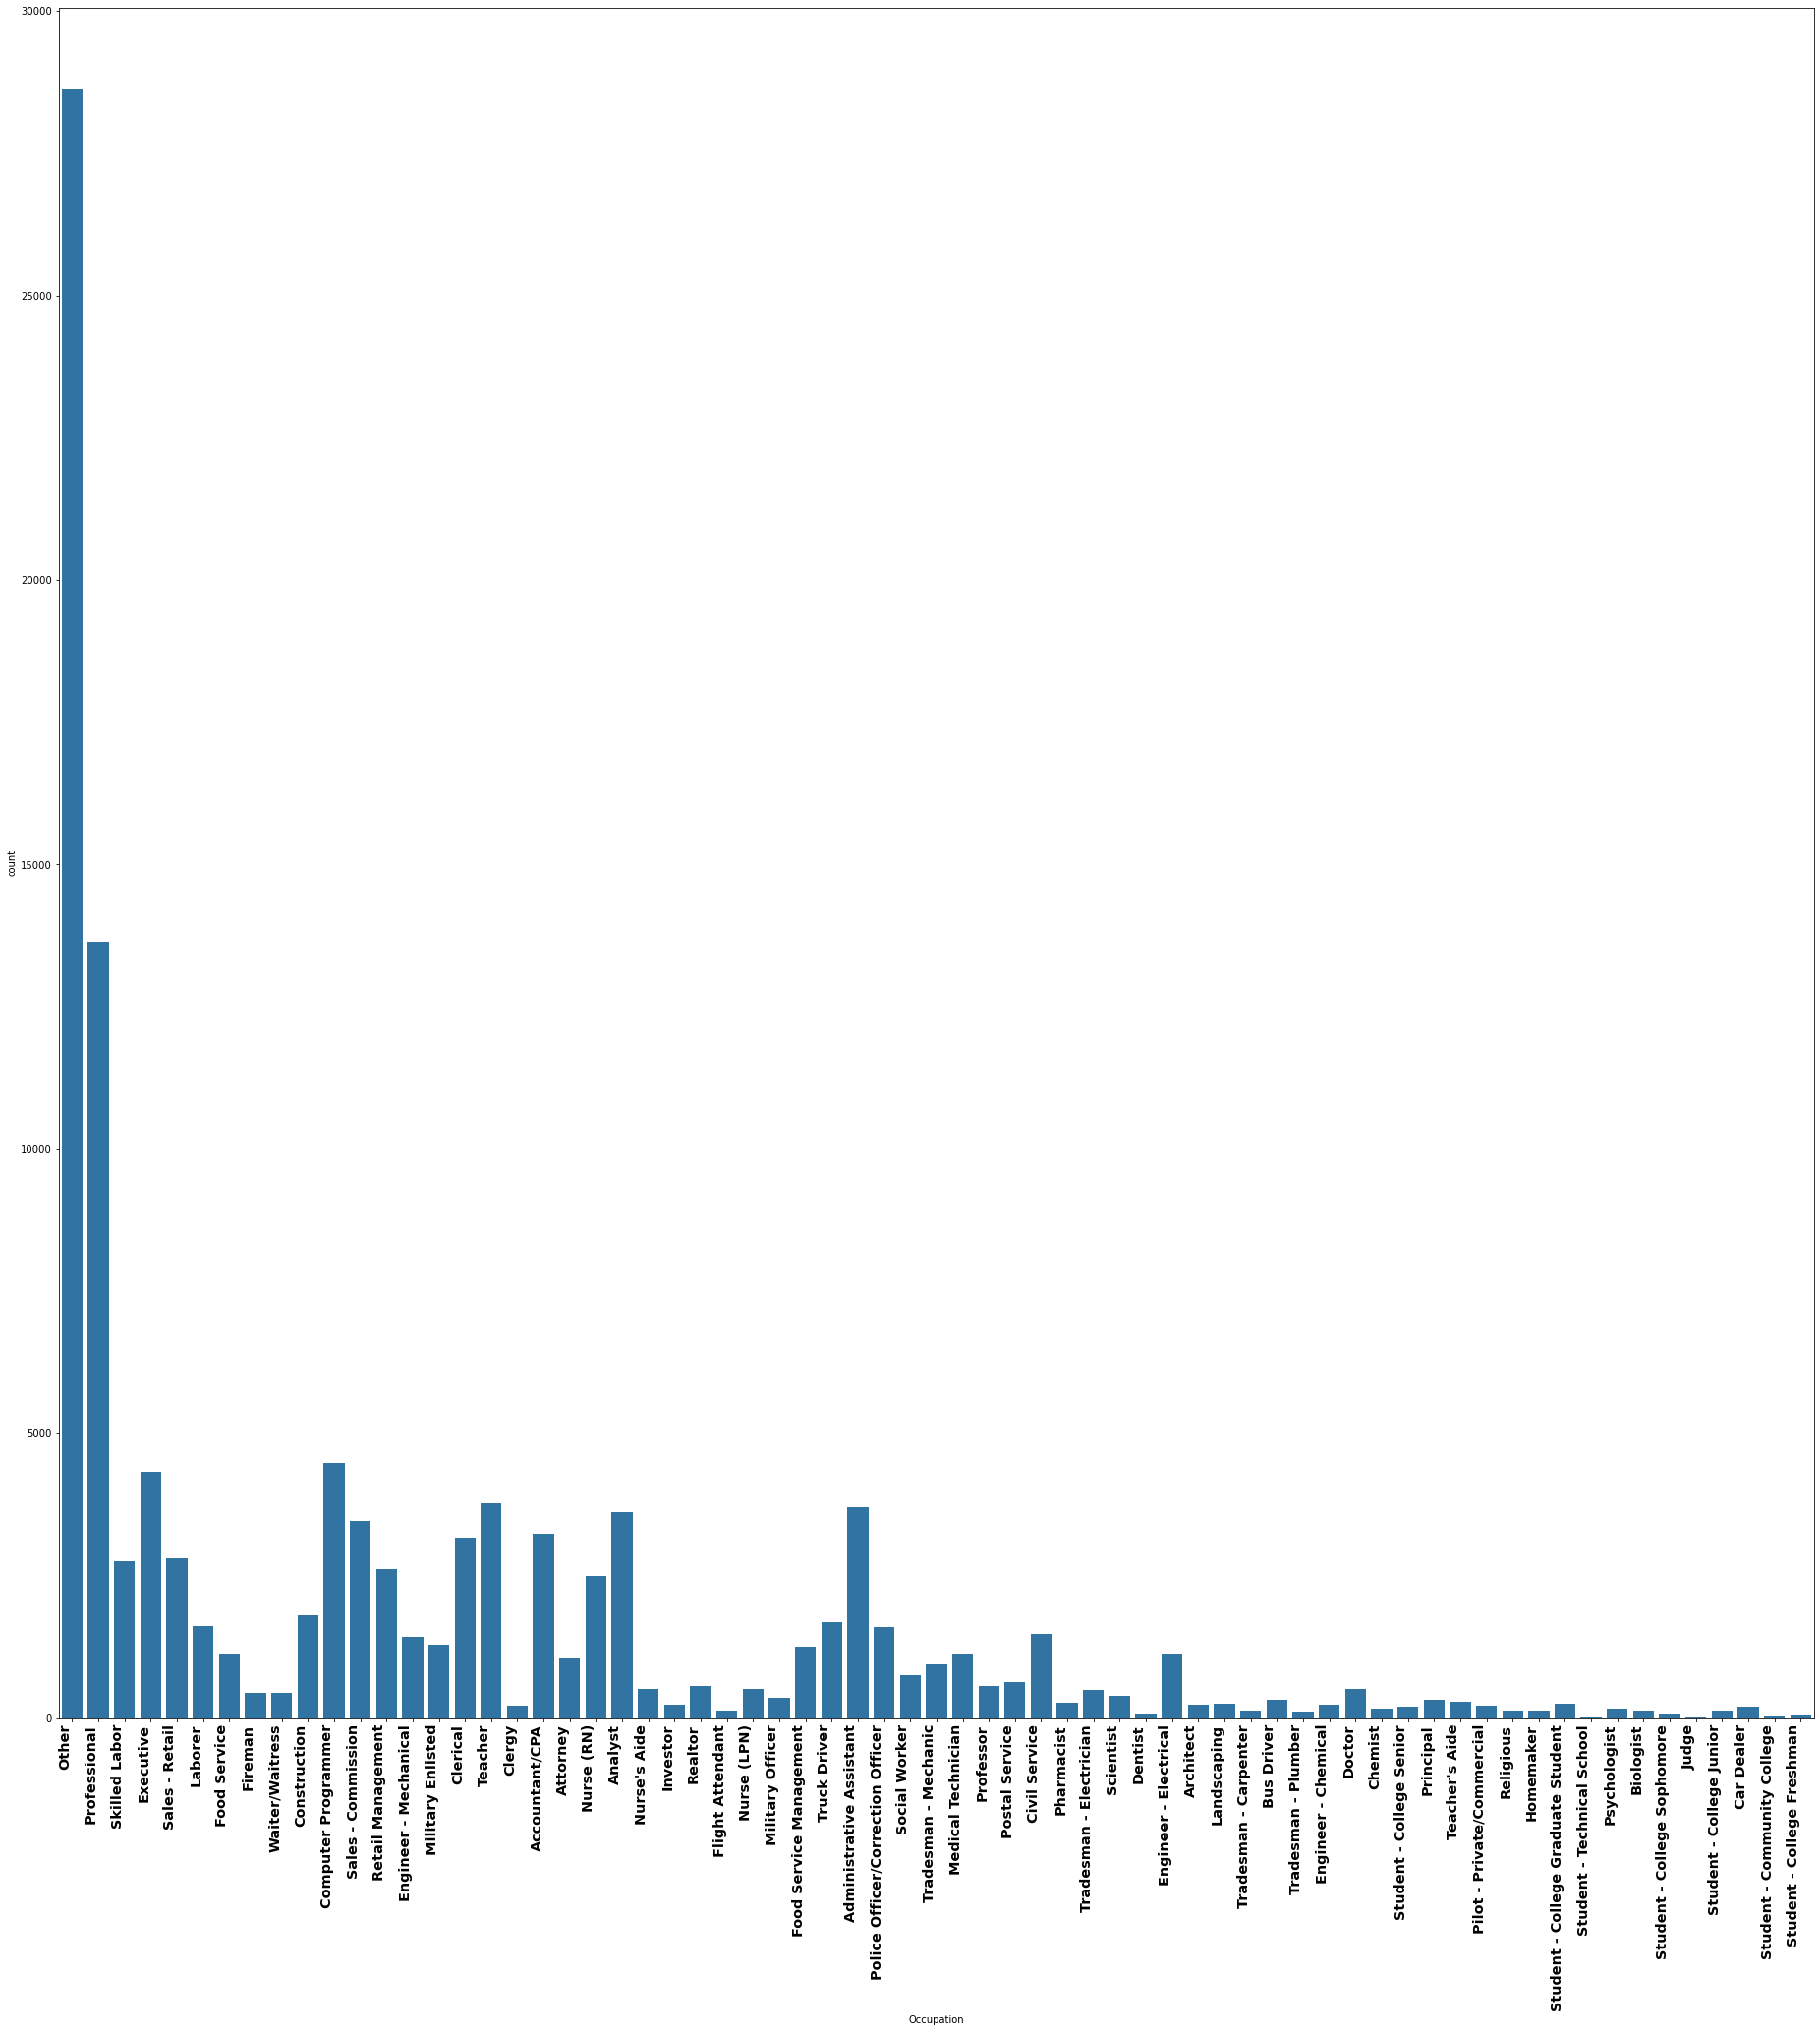

In [24]:
#Let's consider the effect of 'Occupation' in relation to our feature of interest('LoanStatus')
plt.figure(figsize=(32,32))

default_color = sb.color_palette()[0]
occupation = sb.countplot(data = prosper, x = 'Occupation', color = default_color)

occupation.set_xticklabels(occupation.get_xticklabels(), rotation = 90, horizontalalignment = 'right',
                        fontweight='bold',fontsize='x-large')

plt.show();

The category of 'Other' and 'Professional' has the highest number of loan. This is more than 25,000 customers. The company need to be more specific with their customer occupation. 
This will help to further classify and analyse those that are under this category. 

In [25]:
other_occupation = prosper.query("Occupation =='Other'", inplace = False).Occupation.count()
print("Other as occupation = ", other_occupation)
professional_occupation = prosper.query("Occupation =='Professional'", inplace = False).Occupation.count()
print("Professional as occupation = ", professional_occupation)
total_unidentified_occupation = other_occupation + professional_occupation
print("Total unidentifed occupation = ", total_unidentified_occupation)
total_occupation = prosper.Occupation.count()
print("Total occupation = ", total_occupation)

Other as occupation =  28617
Professional as occupation =  13628
Total unidentifed occupation =  42245
Total occupation =  110349


In [26]:
# Define a function to calculate percentage 
def percent_ratio(subtotal, total):
    return int(subtotal/total * 100)

In [27]:
# Calculate percent of customers that have unidetified occupation
print("Percentage of unidentified occupation = ", percent_ratio(total_unidentified_occupation, total_occupation),'%')

Percentage of unidentified occupation =  38 %


The ability of the company to identify the occupation of the 38% of their customers will help in developing targeted products and ads. This group of customers has more than 25 percentile (12% short of 50 percentile) of the company's loan. This is a huge number that must be given close attention. 

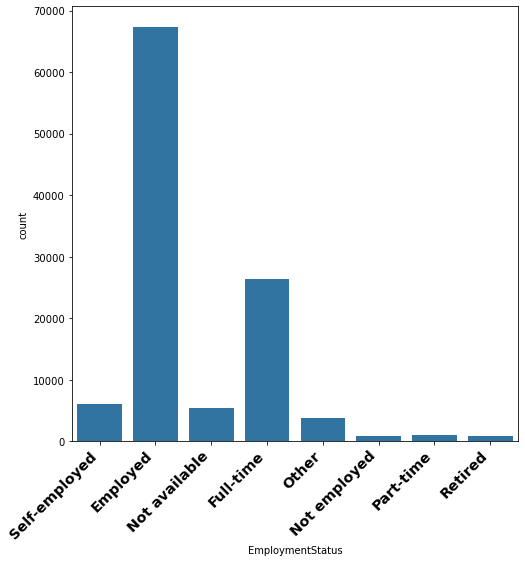

In [28]:
#Let's consider the effect of 'EmploymentStatus' in relation to our feature of interest('LoanStatus')
plt.figure(figsize=(8,8))

default_color = sb.color_palette()[0]
employment_status = sb.countplot(data = prosper, x = 'EmploymentStatus', color = default_color)

employment_status.set_xticklabels(employment_status.get_xticklabels(), rotation = 45, horizontalalignment = 'right',
                        fontweight='bold',fontsize='x-large')

plt.show();

In [29]:
# There is need to determine the total number of customers with 'employed' and 'full-time' status
employed = prosper.query("EmploymentStatus =='Employed'", inplace = False).EmploymentStatus.count()
print("Employment status as 'Employed' = ", employed)
full_time = prosper.query("EmploymentStatus =='Full-time'", inplace = False).EmploymentStatus.count()
print("Employment status as 'Full-time' = ", full_time)
total_gainfully_employed = employed + full_time
print("Total gainfully employed = ", total_gainfully_employed)
total_employment_status = prosper.EmploymentStatus.count()
print("Total employment status = ", total_employment_status)

Employment status as 'Employed' =  67322
Employment status as 'Full-time' =  26355
Total gainfully employed =  93677
Total employment status =  111682


In [30]:
# Calculate percent of customers that are gainfully employed ('Employed' + 'Full-time')
print("Percentage of total gainfully employed = ", percent_ratio(total_gainfully_employed, total_employment_status),"%")

Percentage of total gainfully employed =  83 %


83% is huge! Following pareto's rule which says 20% of customers generate about 80% of business for a company. It is imperative for the company to focus on the percentage that bring in more business. In the case of Prosper as a lending firm, the combination of customers with 'Employed' and 'Full-time' generate 83% of business for her. It is advisable to focus on these classes of customers. Special products, dedicated customer service and targeted feedback mechanism with prompt action are some of the recommended services for these classes of customers. This is percentage that generate the highest the loan.

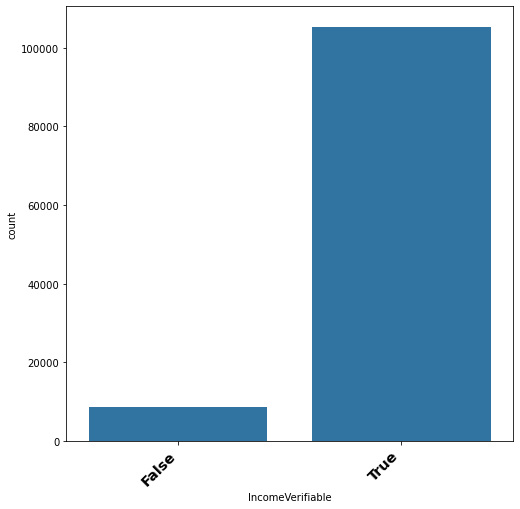

In [31]:
#Let's consider the effect of 'IncomeVerifiable' in relation to our feature of interest('LoanStatus')
plt.figure(figsize=(8,8))

default_color = sb.color_palette()[0]
verify_income = sb.countplot(data = prosper, x = 'IncomeVerifiable', color = default_color)

verify_income.set_xticklabels(verify_income.get_xticklabels(), rotation = 45, horizontalalignment = 'right',
                        fontweight='bold',fontsize='x-large')

plt.show();

In [32]:
# There is need to determine the total number of customers with veriable and otherwise income 
verifiable_income = prosper.query("IncomeVerifiable ==True", inplace = False).IncomeVerifiable.count()
print("Verifiable income = ", verifiable_income)
not_verifiable_income = prosper.query("IncomeVerifiable ==False", inplace = False).IncomeVerifiable.count()
print("unverifiable income = ", not_verifiable_income)
total_income_verification = prosper.IncomeVerifiable.count()
print("Total income verification = ", total_income_verification)

Verifiable income =  105268
unverifiable income =  8669
Total income verification =  113937


In [33]:
# Calculate percent of customers that have unveriafiable income
print("Percentage of total unverifiable income = ", percent_ratio(not_verifiable_income, total_income_verification),"%")

Percentage of total unverifiable income =  7 %


7% of customers have income that cannot be verified which can invariably lead to high possibility of loan denial. Though, this percentage seems small compared to 93% with verifiable income, this mean loss of business to the company. This percentage does not reveal the volume of transactions the company will experience as a result of this. The company can put structure in place verify the income of every customer so as to convert every prospect to a business transaction.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The of 'Employed' and 'Full-time' in the 'Occupation' field are unusual points that generate 83% of business for the company.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

>1.  'CreditGrade','ClosedDate', 'GroupKey', 'TotalProsperLoans', 'TotalProsperPaymentsBilled', 'OnTimeProsperPayments','ProsperPaymentsLessThanOneMonthLate', 'ProsperPaymentsOneMonthPlusLate',                        'ProsperPrincipalBorrowed', 'ProsperPrincipalOutstanding', 'ScorexChangeAtTimeOfListing','LoanFirstDefaultedCycleNumber' fields were dropped because they do not direct impact on our variable of interest. 
>2. 'ListingCreationDate', 'ClosedDate', 'DateCreditPulled', 'FirstRecordedCreditLine', 'LoanOriginationDate' fields were changed from string data type to datetime data type


## Bivariate Exploration

> In this section, relationships between pairs of variables in my data was investigated. I made sure the variables that I covered here have been introduced in some fashion in the previous section (univariate exploration).

To start off with, we need to look at pairwise correlations present between features in the dataset. 

In [34]:
numeric_vars = ['ProsperRating (numeric)', 'LenderYield', 'BorrowerAPR', 'EstimatedReturn', 'StatedMonthlyIncome', 'RevolvingCreditBalance', 'MonthlyLoanPayment']
categoric_vars = ['LoanStatus', 'EmploymentStatus', 'IncomeVerifiable']

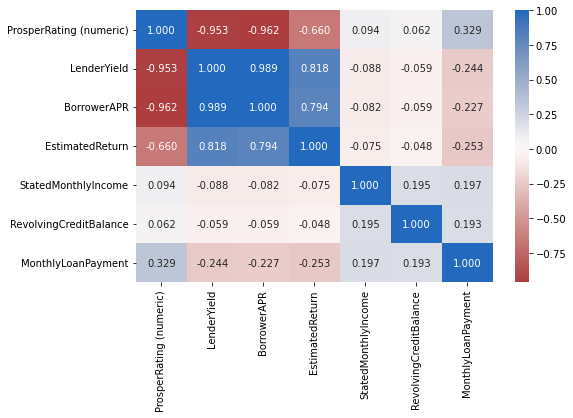

In [35]:
# Correlation plot
plt.figure(figsize = [8,5])
sb.heatmap(prosper[numeric_vars].corr(), annot = True, fmt = '.03f',
          cmap = 'vlag_r', center = 0)
plt.show();

prosper.shape =  (113937, 69)
prosper-samp.shape =  (500, 69)


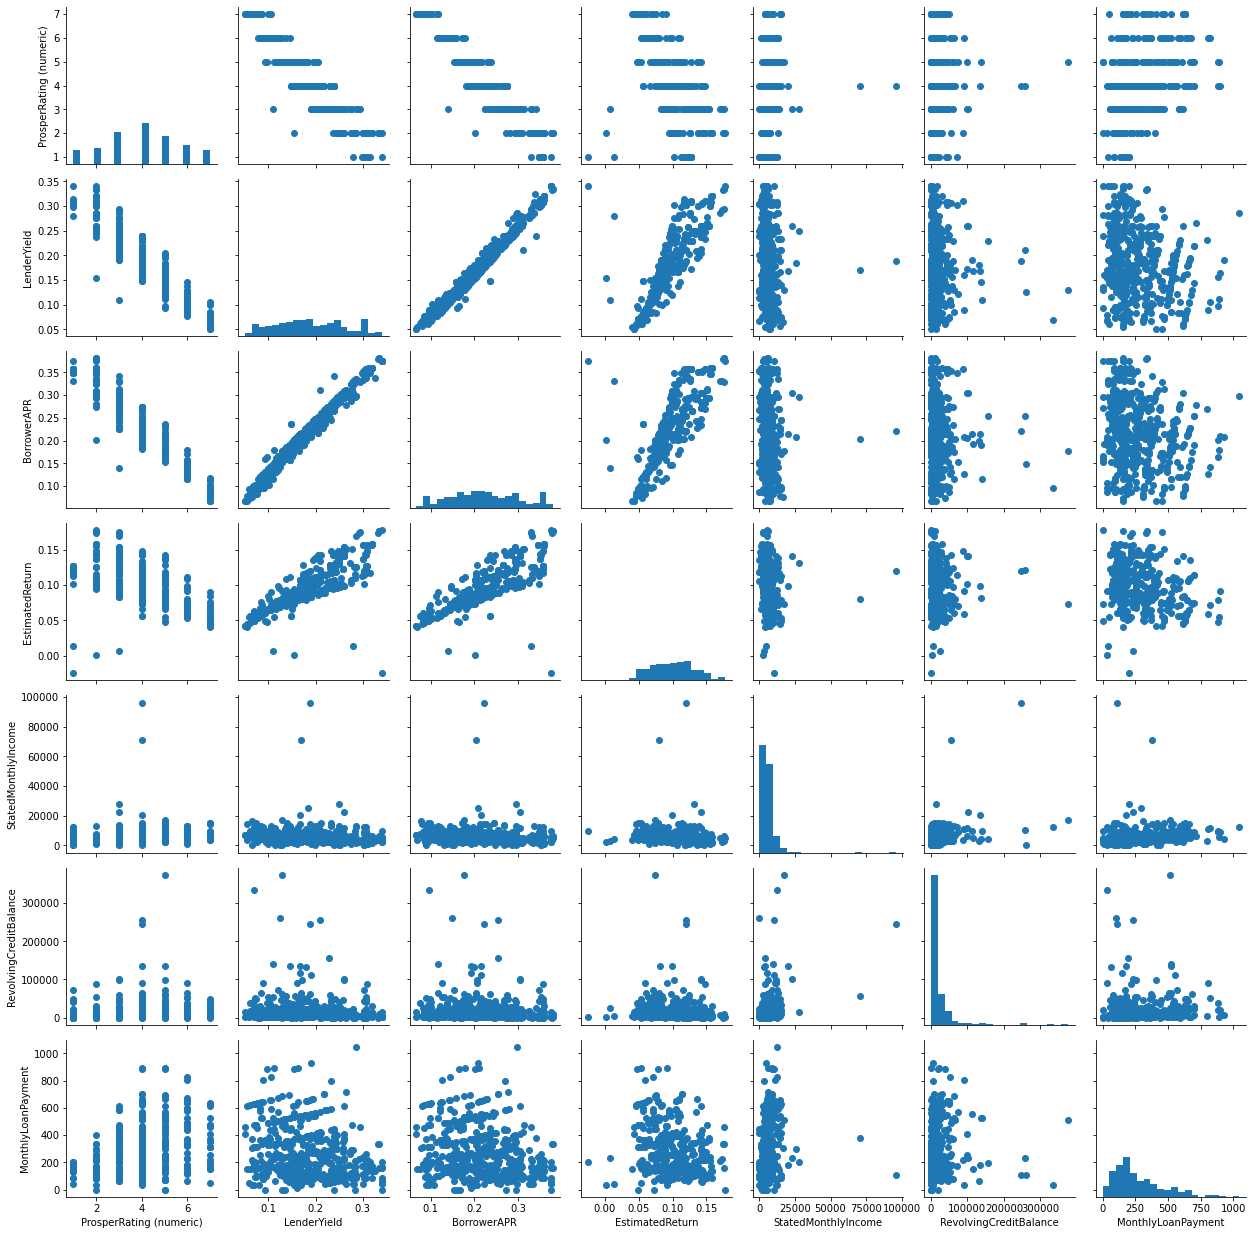

In [36]:
#plot matrix: sample 500 loans so that plots are clearer and they render faster
print("prosper.shape = ", prosper.shape)
prosper_samp = prosper.sample(n = 500, replace = False)
print("prosper-samp.shape = ", prosper_samp.shape)

g = sb.PairGrid(data = prosper_samp, vars = numeric_vars)
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter);

As expected, a strong positive correlation exist between BorrowerAPR, LenderYield and EstimatedReturn. Borrower's APR, which is annual cost of a loan to a borrower-including fees, is dependent on the lender's yield and return on investment. The higher the borower's APR, the more money realised by the lenders. 

Let's move on to look at how LenderYield and BorrowerAPR correlate with the categorical variables.

<Figure size 720x720 with 0 Axes>

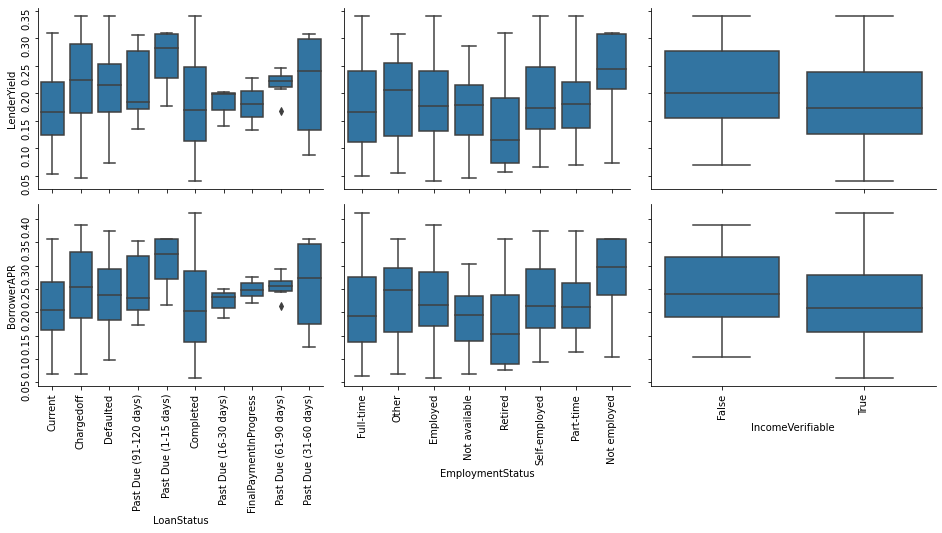

In [37]:
# plot matrix of numeric features against categorical features
# can use a larger sample since there are fewer plots and they are simpler in nature
prosper_samp = prosper.sample(n = 2000, replace = False)

def boxgrid(x, y, **kwargs):
    """ Quick hack for creating box plots with seaborn's PairGrid. """
    default_color = sb.color_palette()[0]
    sb.boxplot(x = x, y = y, color=default_color)

plt.figure(figsize = [10, 10])
g = sb.PairGrid(data = prosper_samp, y_vars = ['LenderYield', 'BorrowerAPR'], x_vars = categoric_vars,
               height = 3, aspect = 1.5)

for ax in g.axes.flatten():
    # rotate x axis labels
    ax.tick_params(rotation = 90)

g.map(boxgrid)


plt.show();

Correlation exist between the two numeric variables of interest and 'LoanStatus', 'EmploymentStatus' and 'IncomeVerifiable'.
Finally, let us look at relationships between the three categorical features('LoanStatus', 'EmploymentStatus' and 'IncomeVerifiable').

Let's look at relationships between the three categorical features.

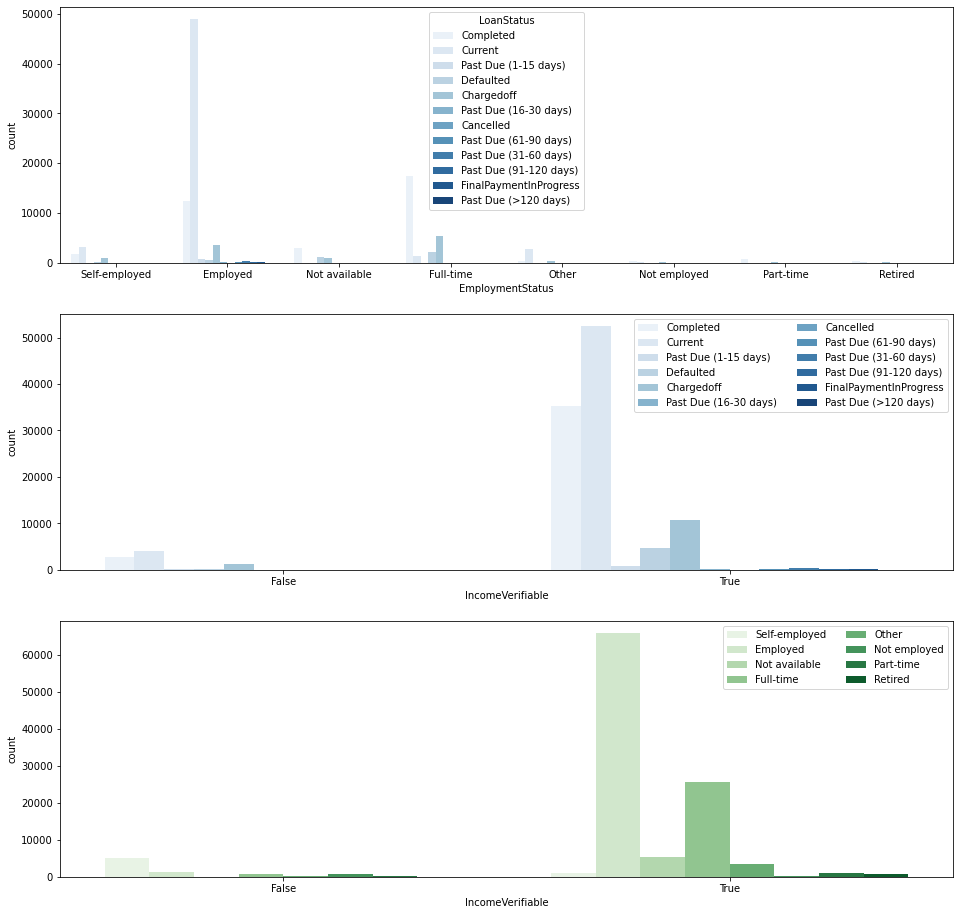

In [38]:
# We will use the full data to create the three subplots
plt.figure(figsize = [16,16])

#subplot 1: 'EmploymentStatus' vs 'LoanStatus'
plt.subplot(3, 1, 1)
sb.countplot(data = prosper, x = 'EmploymentStatus', hue = 'LoanStatus', palette = 'Blues')

#subplot 2: 'IncomeVerifiable' vs 'LoanStatus'
ax = plt.subplot(3, 1, 2)
sb.countplot(data = prosper, x = 'IncomeVerifiable', hue = 'LoanStatus', palette = 'Blues')
ax.legend(ncol = 2) # re-arrange legend to reduce overlapping

#subplot 3: 'IncomeVerifiable' vs 'EmploymentStatus', use different color palette
ax = plt.subplot(3, 1, 3)
sb.countplot(data = prosper, x = 'IncomeVerifiable', hue = 'EmploymentStatus', palette = 'Greens')
ax.legend(loc = 1, ncol = 2) # re-arrange legend to reduce overlapping
    
plt.show();

It look like there are more interaction between 'Completed' and 'Current' ('LoanStatus'
) with the 'Employed' and 'Full-time' (EmploymentStatus).
'Completed' and 'Current' also appear to interact well with customers' with verifiable income. 

Customers that completed their loan tenure and those with current running ones, of course, must have verifiable income sources before the company approves their loan requests.

'Employed' and 'Full-time' also interacted well with verified income. This is in line with earlier observation under univariate exploration. 

We need to dig into some of the relationship more. First, we need to see how 'LenderYield' and 'BorrowerAPR' are related to one another for all of the data, and to plot 'BorrowerAPR' on a log scale.

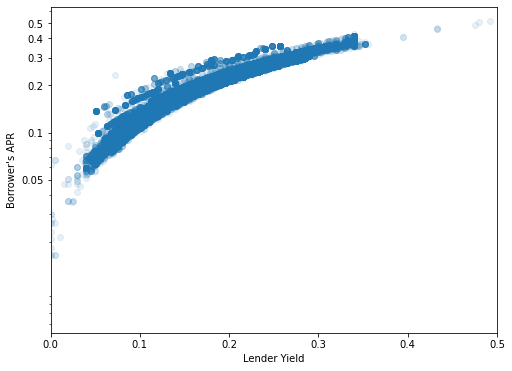

In [39]:
# Scatter plot of 'LenderYield' vs 'BorrowerAPR', with log transform on 'BorrowerAPR' axis
plt.figure(figsize = [8, 6])
plt.scatter(data = prosper, x = 'LenderYield', y = 'BorrowerAPR', alpha = 1/10)
plt.xlim([0, 0.5])
plt.xlabel('Lender Yield')
plt.yscale('log')
plt.yticks([0.05, 1e-1, 2e-1, 3e-1, 4e-1, 5e-1], [0.05, '0.1', '0.2', '0.3', '0.4', '0.5'])
plt.ylabel("Borrower\'s APR")
plt.show();

This plot suggest from the concavity that we might want to also transform the 'LenderYield' variable to see a linear trend.  

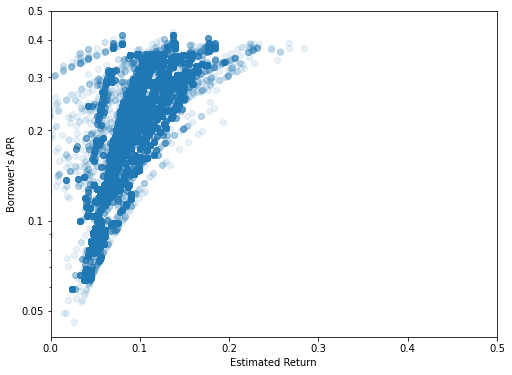

In [40]:
# Scatter plot of 'LenderYield' vs 'BorrowerAPR', with log transform on 'BorrowerAPR' axis
plt.figure(figsize = [8, 6])
plt.scatter(data = prosper, x = 'EstimatedReturn', y = 'BorrowerAPR', alpha = 1/10)
plt.xlim([0, 0.5])
plt.xlabel('Estimated Return')
plt.yscale('log')
plt.yticks([0.05, 1e-1, 2e-1, 3e-1, 4e-1, 5e-1], [0.05, '0.1', '0.2', '0.3', '0.4', '0.5'])
plt.ylabel("Borrower\'s APR")
plt.show();

A lot of clusters between 0.1 and 0.5 in 'BorrowerAPR'. The 'EstimatedReturn' looks correlated with 'BorrowerAPR'.  

Let us write a function to perform cube root and inverse so that a plot on 'EstimatedReturn'.

In [41]:
# A cube root function
def cuberoot_trans(x, inverse = False):
    """ Quick fucntion for computing cube root and cube operations. """
    if not inverse:
        return x ** (1/3)
    else:
        return x ** 3

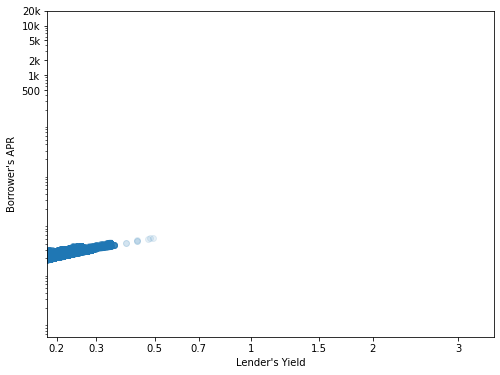

In [42]:
# scatter plot of 'BorrowerAPR' vs 'EstimatedReturn', with log transform on 'BorrowerAPR' axis and 
# cube root transform on price
prosper['cr_lender_yield'] = prosper['LenderYield'].apply(cuberoot_trans)

plt.figure(figsize = [8, 6])
plt.scatter(data=prosper, x = 'cr_lender_yield', y = 'BorrowerAPR', alpha = 1/10)

lender_yield_ticks = [0.2, 0.3, 0.5, 0.7, 1, 1.5, 2, 3]
plt.xticks(cuberoot_trans(np.array(lender_yield_ticks)), lender_yield_ticks)
plt.xlim([cuberoot_trans(0.18), cuberoot_trans(3.5)])
plt.xlabel("Lender\'s Yield")

plt.yscale('log')

plt.yticks([500, 1e3, 2e3, 5e3, 1e4, 2e4], [500, '1k', '2k', '5k', '10k', '20k'])
#plt.yticks([0.05, 1e-1, 2e-1, 3e-1, 4e-1, 5e-1], [0.05, '0.1', '0.2', '0.3', '0.4', '0.5'])
plt.ylabel("Borrower\'s APR")
plt.show();

In [43]:
# compute the logarithm of price to make multivariate plotting easier
def log_trans(x, inverse = False):
    """Quick function for computing log and power operations. """
    if not inverse:
        return np.log10(x)
    else:
        return np.power(10, x)
    
prosper['log_borrower_apr'] = prosper['BorrowerAPR'].apply(log_trans)
    
    

#### Define

#### Issue: The cr_lender_yield have values that are of infinity and complex numbers. This will throw error when plotting the violinplots
#### Solution: Convert all infinity values to NaN and then drop all the rows that are involved. Then change the type of complex numbers to long double using astype() function. 

#### Code

In [44]:
#Check infinity values
# 'log_lender_yield'
c = np.isinf(prosper['log_borrower_apr']).values.sum()
c

0

In [45]:
#Check infinity values
# 'LenderYield'
c = np.isinf(prosper['cr_lender_yield']).values.sum()
c

0

In [46]:
# Remove inf values in 'log_lender_yield' by replacing with NaN
prosper.replace([np.inf, -np.inf], np.nan, inplace=True)

In [47]:
# Drop NaN in cr_lender_yield
prosper.dropna(subset=['cr_lender_yield'])


,ListingKey,ListingNumber,ListingCreationDate,Term,LoanStatus,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,...,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors,cr_lender_yield,log_borrower_apr
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263,36,Completed,0.16516,0.1580,0.1380,NaN,NaN,...,0.0,0.0,0.0,1.0,0,0,0.0,258,0.516765+0.000000j,-0.782095
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900,36,Current,0.12016,0.0920,0.0820,0.07960,0.0249,...,0.0,0.0,0.0,1.0,0,0,0.0,1,0.434448+0.000000j,-0.920240
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090,36,Completed,0.28269,0.2750,0.2400,NaN,NaN,...,0.0,0.0,0.0,1.0,0,0,0.0,41,0.621447+0.000000j,-0.548690
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010,36,Current,0.12528,0.0974,0.0874,0.08490,0.0249,...,0.0,0.0,0.0,1.0,0,0,0.0,158,0.443783+0.000000j,-0.902118
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097,36,Current,0.24614,0.2085,0.1985,0.18316,0.0925,...,0.0,0.0,0.0,1.0,0,0,0.0,20,0.583338+0.000000j,-0.608818
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113932,E6D9357655724827169606C,753087,2013-04-14 05:55:02.663,36,Current,0.22354,0.1864,0.1764,0.16490,0.0699,...,0.0,0.0,0.0,1.0,0,0,0.0,1,0.560832+0.000000j,-0.650645
113933,E6DB353036033497292EE43,537216,2011-11-03 20:42:55.333,36,FinalPaymentInProgress,0.13220,0.1110,0.1010,0.10070,0.0200,...,0.0,0.0,0.0,1.0,0,0,0.0,22,0.465701+0.000000j,-0.878769
113934,E6E13596170052029692BB1,1069178,2013-12-13 05:49:12.703,60,Current,0.23984,0.2150,0.2050,0.18828,0.1025,...,0.0,0.0,0.0,1.0,0,0,0.0,119,0.589637+0.000000j,-0.620078
113935,E6EB3531504622671970D9E,539056,2011-11-14 13:18:26.597,60,Completed,0.28408,0.2605,0.2505,0.24450,0.0850,...,0.0,0.0,0.0,1.0,0,0,0.0,274,0.630380+0.000000j,-0.546559


In [48]:
#Cast cr_lender_yield to long double (np.float64) 
prosper["cr_lender_yield"]= prosper["cr_lender_yield"].astype(np.float64)

#### Test

In [49]:

prosper

,ListingKey,ListingNumber,ListingCreationDate,Term,LoanStatus,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,...,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors,cr_lender_yield,log_borrower_apr
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263,36,Completed,0.16516,0.1580,0.1380,NaN,NaN,...,0.0,0.0,0.0,1.0,0,0,0.0,258,0.516765,-0.782095
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900,36,Current,0.12016,0.0920,0.0820,0.07960,0.0249,...,0.0,0.0,0.0,1.0,0,0,0.0,1,0.434448,-0.920240
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090,36,Completed,0.28269,0.2750,0.2400,NaN,NaN,...,0.0,0.0,0.0,1.0,0,0,0.0,41,0.621447,-0.548690
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010,36,Current,0.12528,0.0974,0.0874,0.08490,0.0249,...,0.0,0.0,0.0,1.0,0,0,0.0,158,0.443783,-0.902118
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097,36,Current,0.24614,0.2085,0.1985,0.18316,0.0925,...,0.0,0.0,0.0,1.0,0,0,0.0,20,0.583338,-0.608818
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113932,E6D9357655724827169606C,753087,2013-04-14 05:55:02.663,36,Current,0.22354,0.1864,0.1764,0.16490,0.0699,...,0.0,0.0,0.0,1.0,0,0,0.0,1,0.560832,-0.650645
113933,E6DB353036033497292EE43,537216,2011-11-03 20:42:55.333,36,FinalPaymentInProgress,0.13220,0.1110,0.1010,0.10070,0.0200,...,0.0,0.0,0.0,1.0,0,0,0.0,22,0.465701,-0.878769
113934,E6E13596170052029692BB1,1069178,2013-12-13 05:49:12.703,60,Current,0.23984,0.2150,0.2050,0.18828,0.1025,...,0.0,0.0,0.0,1.0,0,0,0.0,119,0.589637,-0.620078
113935,E6EB3531504622671970D9E,539056,2011-11-14 13:18:26.597,60,Completed,0.28408,0.2605,0.2505,0.24450,0.0850,...,0.0,0.0,0.0,1.0,0,0,0.0,274,0.630380,-0.546559


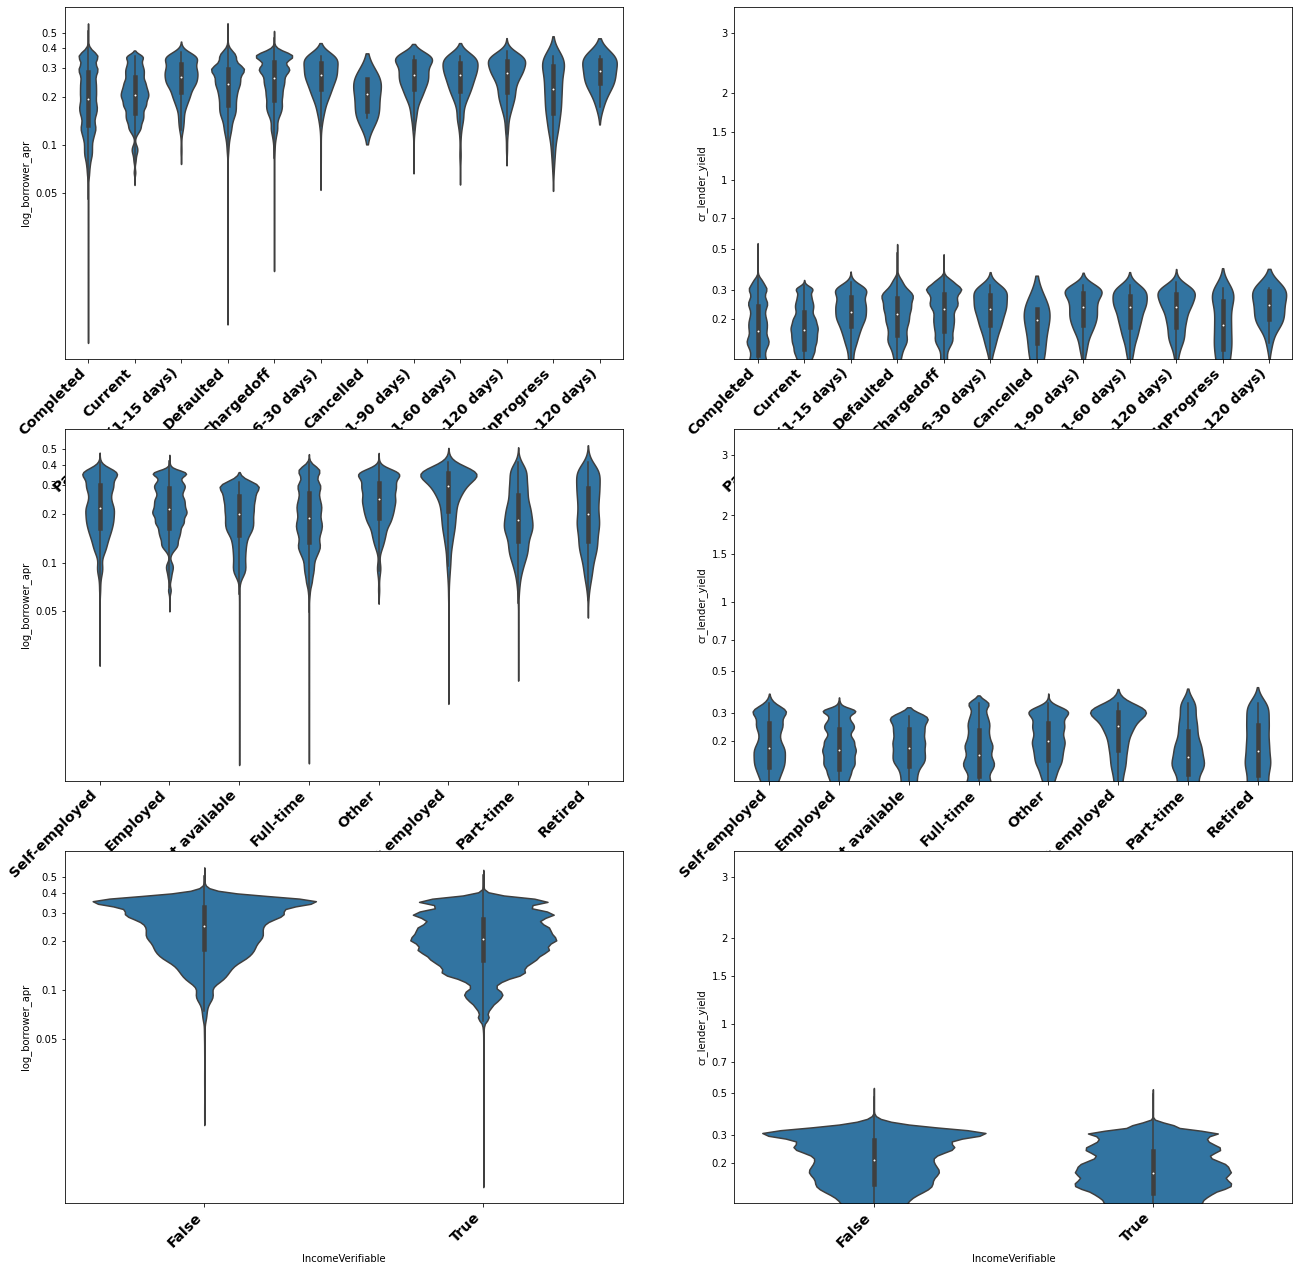

In [50]:
# plot the categorical variables against 'LenderYield' and 'BorrowerAPR' again, this time
# with full data and variable transforms
fig, ax = plt.subplots(ncols = 2, nrows = 3, figsize = [22, 22])

for i in range(len(categoric_vars)):
    var = categoric_vars[i]
    a = sb.violinplot(data = prosper, x = var, y = 'log_borrower_apr', ax = ax[i, 0],
                 color = default_color)
    a.set_xticklabels(a.get_xticklabels(), rotation = 45, horizontalalignment = 'right',
                        fontweight='bold',fontsize='x-large');
    ax[i, 0].set_yticks(log_trans(np.array([0.05, 1e-1, 2e-1, 3e-1, 4e-1, 5e-1])))
    ax[i, 0].set_yticklabels([0.05, '0.1', '0.2', '0.3', '0.4', '0.5'])
    b = sb.violinplot(data = prosper, x = var, y = 'cr_lender_yield', ax = ax[i, 1],
                 color = default_color)
    b.set_xticklabels(b.get_xticklabels(), rotation = 45, horizontalalignment = 'right',
                        fontweight='bold',fontsize='x-large');
    ax[i, 1].set_yticks(cuberoot_trans(np.array(lender_yield_ticks)))
    ax[i, 1].set_yticklabels(lender_yield_ticks)
    ax[i, 1].set_ylim(cuberoot_trans(np.array([0.1, 3.5])))
          
plt.show();

The plot of the full data using violin plot and variable transformations reveals much more than the earlier box plots. It is highly suggested that log of Borrower's APR and cube root of lender have identical violin plots, but with varying values, across all the categoric variables.      

In [51]:
# We need to check for discriptive statistics of numerical datatypes 

In [52]:
#prosper.describe(include=['float64', 'int64'])

In [53]:
# #Plotting each category of loan status against LenderYield
# prosper_loan_current = prosper.loc[prosper['LoanStatus']=='Current']
# prosper_loan_completed = prosper.loc[prosper['LoanStatus']=='Completed']
# prosper_loan_chargedoff = prosper.loc[prosper['LoanStatus']=='Chargedoff']
# prosper_loan_defaulted = prosper.loc[prosper['LoanStatus']=='Defaulted']
# prosper_loan_cancelled = prosper.loc[prosper['LoanStatus']=='Cancelled']

In [54]:
# plt.plot(prosper_loan_current['LenderYield'], np.zeros_like(prosper_loan_current['LenderYield']), 'o')
# plt.plot(prosper_loan_completed['LenderYield'], np.zeros_like(prosper_loan_completed['LenderYield']), 'o')
# plt.plot(prosper_loan_chargedoff['LenderYield'], np.zeros_like(prosper_loan_chargedoff['LenderYield']), 'o')
# plt.plot(prosper_loan_defaulted['LenderYield'], np.zeros_like(prosper_loan_defaulted['LenderYield']), 'o')
# plt.plot(prosper_loan_cancelled['LenderYield'], np.zeros_like(prosper_loan_cancelled['LenderYield']), 'o')
# plt.xlabel('Loan Status')
# plt.show();

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> The 'LenderYield' has a positive strong correlation with 'BorrowerAPR'. The higher the borrower's APR, the more yield the lenders make on the platform. As expected, 'BorrowerAPR' also has a strong positive correlation on the 'EstimatedReturn'. 'LoanStatus' is also positively affected by 'BorrowerAPR' and 'LenderYield'

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> There is an interestting relationship between 'IncomeVerifiable' and 'EmploymentStatus'. Most of the customers that either 'Employed' or 'Full-time', have more verifiable income sources. The company can comfortable focus on this class of customers for a higher return on investment.

## Multivariate Exploration

> I created plots of three or more variables to investigate my data even
further. I made sure that my investigations are justified, and follow from
your work in the previous sections.

The main thing we will explore in this session is how the three categorical measures play into the relationsip between 'BorrowerAPR', 'LenderYield' and 'LoanStatus'

In [55]:
# def hist2dgrid(x, y, **kwargs):
#     """Quick hack for creating heat maps with seaborn's PairGrid. """
#     palette = kwargs.pop('color')
#     bins_x = np.arange(cuberoot_trans(0.05), cuberoot_trans(0.5)+.05, .05)
#     bins_y = np.arange(0.05, 0.5+0.1, 0.1)
#     plt.hist2d(x, y, bins = [bins_x, bins_y], cmap = palette, cmin = 0.05)
#     plt.xticks(cuberoot_trans(np.array(lender_yield_ticks)), lender_yield_ticks)
#     plt.yticks(log_trans(np.array([0.05, 1e-1, 2e-1, 3e-1, 4e-1, 5e-1])),
#                 [0.05, '0.1', '0.2', '0.3', '0.4', '0.5'])
#     #plt.yticks(log_trans(np.array([500, 1e3, 2e3, 5e3, 1e4, 2e4])),
#      #          [500, '1k', '2k', '5k', '10k', '20k'])

In [77]:
# # Create a faceted heat maps on levels of the 'LoanStatus' variable
# g = sb.FacetGrid(data = prosper, col = 'LoanStatus', col_wrap = 3, height = 3)
#                 #xlim  = [cuberoot_trans(0.05), cuberoot_trans(0.5)])
# g.map(hist2dgrid, 'cr_lender_yield', 'log_borrower_apr', color = 'inferno_r')
# g.set_xlabels('Lender Yield')
# g.set_ylabels("Borrower\'s APR")

# plt.show();


In [57]:
# Select 'LenderYield' of approximately 0.2 (This could mean 20% yield for the investor)
yield_flag = (prosper['LenderYield'] >= 0.1999) & (prosper['LenderYield'] <= 0.2005)
yield_2c = prosper.loc[yield_flag,:]


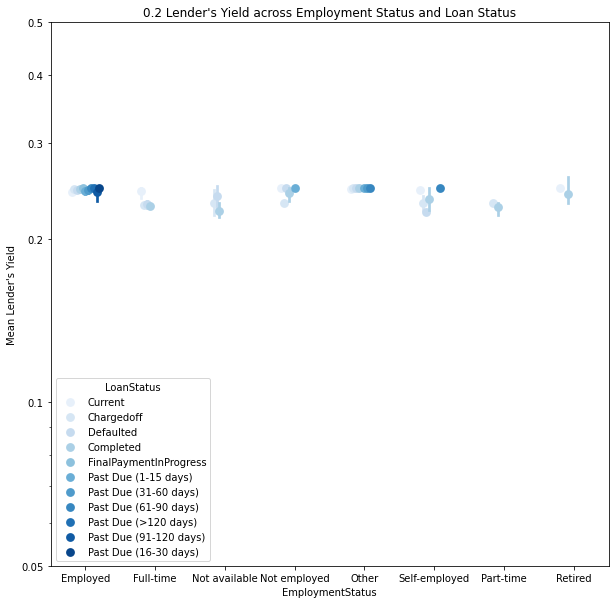

In [66]:
fig = plt.figure(figsize = [10,10])
ax = sb.pointplot(data = yield_2c, x = 'EmploymentStatus', y = 'BorrowerAPR', hue = 'LoanStatus',
           palette = 'Blues', linestyles = '', dodge = 0.4)
plt.title('0.2 Lender\'s Yield across Employment Status and Loan Status')
plt.ylabel('Mean Lender\'s Yield')
plt.yscale('log')
plt.yticks([0.05, 1e-1, 2e-1, 3e-1, 4e-1, 5e-1],
                [0.05, '0.1', '0.2', '0.3', '0.4', '0.5'])
#plt.yticks([2e3, 4e3, 6e3, 1e4], ['2k', '4k', '6k', '10k'])
ax.set_yticklabels([],minor = True)
plt.show();

A dodged point plot for 'LenderYield' of approximately 0.2 shows the clear influence of how current loan are being dominated by customers with 'Employed' and 'Full-time' status.

In [61]:
# Select 'LenderYield' of approximately 0.05 (This could mean 5% yield for the investor)
yield_flag = (prosper['LenderYield'] >= 0.0499) & (prosper['LenderYield'] <= 0.0505)
yield_05c = prosper.loc[yield_flag,:]


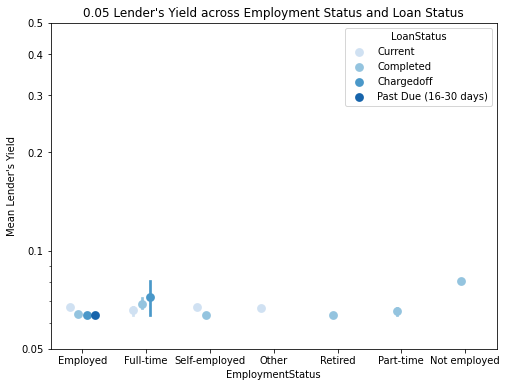

In [65]:
fig = plt.figure(figsize = [8,6])
ax = sb.pointplot(data = yield_05c, x = 'EmploymentStatus', y = 'BorrowerAPR', hue = 'LoanStatus',
           palette = 'Blues', linestyles = '', dodge = 0.4)
plt.title('0.05 Lender\'s Yield across Employment Status and Loan Status')
plt.ylabel('Mean Lender\'s Yield')
plt.yscale('log')
plt.yticks([0.05, 1e-1, 2e-1, 3e-1, 4e-1, 5e-1],
                [0.05, '0.1', '0.2', '0.3', '0.4', '0.5'])
#plt.yticks([2e3, 4e3, 6e3, 1e4], ['2k', '4k', '6k', '10k'])
ax.set_yticklabels([],minor = True)
plt.show();

'Not Available' EmploymentStatus are excluded in the pointplot for Lender's Yield of values of 0.05. Unfortunately, there are still some clients with 'Employed' status that has chargedoff loan.(These are loans the borrower believe are not recoverable)  

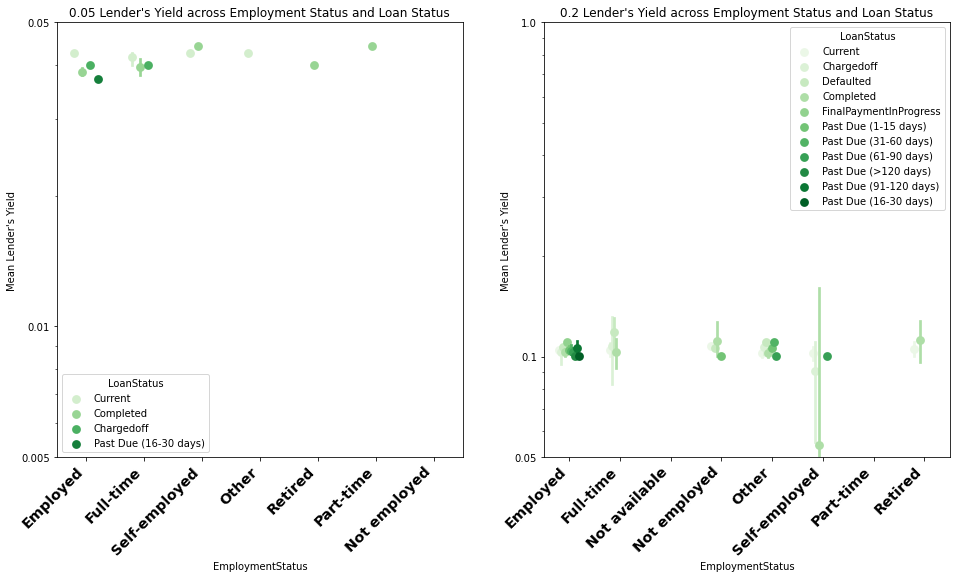

In [76]:
fig, ax = plt.subplots(ncols = 2, figsize = [16,8])

c= sb.pointplot(data = yield_05c, x = 'EmploymentStatus', y = 'EstimatedReturn', hue = 'LoanStatus',
             palette = 'Greens', linestyles = '', dodge = 0.4, ax = ax[0])
ax[0].set_title('0.05 Lender\'s Yield across Employment Status and Loan Status')
ax[0].set_ylabel('Mean Lender\'s Yield')
ax[0].set_yscale('log')
ax[0].set_yticks([0.005, 0.01, 0.05])
ax[0].set_yticklabels(['0.005', '0.01', '0.05'])
ax[0].set_yticklabels([],minor = True)
c.set_xticklabels(c.get_xticklabels(), rotation = 45, horizontalalignment = 'right',
                        fontweight='bold',fontsize='x-large');

d = sb.pointplot(data = yield_2c, x = 'EmploymentStatus', y = 'EstimatedReturn', hue = 'LoanStatus',
             palette = 'Greens', linestyles = '', dodge = 0.4, ax = ax[1])
ax[1].set_title('0.2 Lender\'s Yield across Employment Status and Loan Status')
ax[1].set_ylabel('Mean Lender\'s Yield')
ax[1].set_yscale('log')
ax[1].set_yticks([0.05, 0.1, 1.0])
ax[1].set_yticklabels(['0.05', '0.1', '1.0'])
ax[1].set_yticklabels([],minor = True)
d.set_xticklabels(d.get_xticklabels(), rotation = 45, horizontalalignment = 'right',
                        fontweight='bold',fontsize='x-large');
plt.show();

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Customers with 'Employed' and 'Full-time' EmploymentStatus have more 'Current' and 'Completed' LoanStatus.  

### Were there any interesting or surprising interactions between features?

> It is interesting to note that customers with 'Employed' EmploymentStatus have more 'Chargedoff' LoanStatus, this is expected for 'Not employed'.

## Conclusions
> The 'BorrowerAPR' has a positive correlation with 'EstimatedReturn'. Rather than being discouraged, lenders should be encouraged to invest more. Prosper as a company should more developing products for customers that are in full time employment, since they generate about 83% revenue for the company. 


## Resources
>1. https://stats.stackexchange.com/questions/226721/when-is-it-acceptable-to-drop-an-entire-feature-from-a-data-set-due-to-missing-o
>2. https://www.consumerfinance.gov/ask-cfpb/what-is-the-difference-between-an-interest-rate-and-the-annual-percentage-rate-apr-in-an-auto-loan-en-733/#:~:text=The%20Annual%20Percentage%20Rate%20(APR)%20is%20the%20cost%20you%20pay,pay%20to%20get%20the%20loan.
>3. https://stackoverflow.com/questions/31029560/plotting-categorical-data-with-pandas-and-matplotlib
>4. https://www.cuemath.com/data/right-skewed-histogram/
>5. https://drawingfromdata.com/seaborn/matplotlib/visualization/rotate-axis-labels-matplotlib-seaborn.html
>6. https://stackoverflow.com/questions/60843085/how-to-rotate-labels-in-a-seaborn-pairgrid
>7. https://www.geeksforgeeks.org/check-if-dataframe-contains-infinity-in-python-pandas/ 
>8. https://stackoverflow.com/questions/48328970/how-to-convert-pandas-columns-to-double-in-for-loop
>9. https://stackoverflow.com/questions/56350531/seaborn-violinplot-experiences-difficulty-with-too-many-variables